In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from numpy import sin, cos, pi, sqrt, log
G = bilby.core.utils.constants.gravitational_constant
speed_of_light = bilby.core.utils.constants.speed_of_light
solar_mass = bilby.core.utils.constants.solar_mass
parsec = bilby.core.utils.constants.parsec

In [61]:
mass_1 = 30 * solar_mass
mass_2 = 30 * solar_mass
luminosity_distance = 500 * 1e6 * parsec
iota = 0.2
geocent_time = 0
phase = 0
reference_frequency = 20

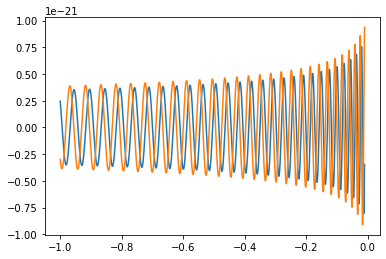

In [76]:
def Blanchet1996(time, mass_1, mass_2, luminosity_distance, iota, geocent_time, phase, reference_frequency):
    total_mass = mass_1 + mass_2
    eta = mass_1 * mass_2 / total_mass ** 2
    delta_mass = mass_1 - mass_2
    Theta = speed_of_light ** 3 * eta  * (geocent_time - time) / (5 * G * total_mass)  # (6)
    cosi = cos(iota)
    sini = sin(iota)
    omega0 = 2 * pi * reference_frequency
    
    # Equation (7)
    curly_brackets = (
        Theta ** (5/8) 
        + (3715/8064 + 55 / 96 * eta) * Theta ** (3/8)
        - 3 * pi / 4 * Theta  ** (1 / 4)
        + (9275495 / 14450688 + 284875 / 258048 * eta + 185 / 2048 * eta ** 2) * Theta ** (1/8)
    )
    phi = phase - curly_brackets / eta
    
    # Equation (8)
    curly_brackets = (
        Theta ** (-3/8) 
        + (743/2688 + 11 / 32 * eta) * Theta ** (-5/8)
        - 3 * pi / 10 * Theta  ** - (3 / 4)
        + (1855099 / 14450688 + 56975 / 258048 * eta + 371 / 2048 * eta ** 2) * Theta ** (-7/8)
    )
    omega = speed_of_light ** 3 / (8 * G * total_mass) * curly_brackets
    
    # Equation (5)
    psi = phi - 2 * G * total_mass * omega / speed_of_light ** 3 * np.log(omega / omega0)
    
    Hcross0 = - 2 * cosi * sin(2 * psi)
    Hcross12 = - 3 /4 * sini * cosi * delta_mass / total_mass * (sin(psi) - 3 * sin(3 * psi))
    Hcross1 = cosi / 3 * ((17 - 4 * cosi ** 2) - eta * (13 - 12 * cosi ** 2)) * sin(2 * psi) - 8 / 3 * (1 - 3 * eta) * cosi * sini ** 2 * sin(4 * psi)
    curly_brackets = (
        (63 - 5 * cosi**2) - 2 * eta * (23 - 5 * cosi ** 2) * sin(psi)
        - 27 / 2 * ((67 - 15 * cosi ** 2) - 2 * eta * (23 - 5 * cosi ** 2)) * sin(3 * psi)
        + 625 / 2 * (1 - 2 * eta) * sini ** 2 * sin(5 * psi)
    )
    Hcross32 = (
        sini * cosi / 96 * delta_mass / total_mass * curly_brackets - 2 * pi * cosi * sin(2 * psi)
    )
    sbA = (
        (68 + 226 * cosi ** 2 - 15 * cosi ** 4)
        + 5 / 3 * eta * (572 - 490 * cosi ** 2 + 45 * cosi ** 4)
        - 5 * eta ** 2 * (56 - 70 * cosi ** 2 + 15 *  cosi ** 4)
    )
    sbB = (
        5 * eta ** 2 * (56 - 70 * cosi ** 2 + 15 * cosi ** 4)
        + 5 / 3 * eta * (572 - 490 * cosi ** 2 + 45 * cosi ** 4)
        - 5 * eta * (56 - 70 * cosi ** 2 + 15 * cosi ** 4)
    )
    curly_brackets = (
        (3 + 10 * log(2)) * cos(psi) + 5 * pi * sin(psi) - 9 * (7 - 10 * log(3/2)) * cos(3 * psi) - 45 * pi * sin(3 * psi)
    )
    Hcross2 = (
        sini / 60 * sbA * sin(2 * psi) 
        + 4 / 15 * cosi * sini ** 2 * sbB * sin (4 * psi)
        - 81 / 20  * (1 - 5 * eta + 5 * eta ** 2) * cosi * sini**4 * sin(6 * psi)
        - 3 / 20 * sini * cosi * delta_mass / total_mass * curly_brackets
    )
    
    Hplus0 = - (1 + cosi ** 2) * cos(2 * psi)
    Hplus12 = - sini / 8 * delta_mass / total_mass * ((5 + cosi ** 2) * cos(psi) - 9 * (1 + cosi**2) * cos(3 * psi))
    Hplus1 = cosi / 3 * ((17 - 4 * cosi ** 2) - eta * (13 - 12 * cosi ** 2)) * sin(2 * psi) - 8 / 3 * (1 - 3 * eta) * cosi * sini ** 2 * sin(4 * psi)
    curly_brackets = (
        (63 - 5 * cosi**2) - 2 * eta * (23 - 5 * cosi ** 2) * sin(psi)
        - 27 / 2 * ((67 - 15 * cosi ** 2) - 2 * eta * (23 - 5 * cosi ** 2)) * sin(3 * psi)
        + 625 / 2 * (1 - 2 * eta) * sini ** 2 * sin(5 * psi)
    )
    Hplus32 = (
        sini * cosi / 96 * delta_mass / total_mass * curly_brackets - 2 * pi * cosi * sin(2 * psi)
    )
    sbA = (
        (68 + 226 * cosi ** 2 - 15 * cosi ** 4)
        + 5 / 3 * eta * (572 - 490 * cosi ** 2 + 45 * cosi ** 4)
        - 5 * eta ** 2 * (56 - 70 * cosi ** 2 + 15 *  cosi ** 4)
    )
    sbB = (
        5 * eta ** 2 * (56 - 70 * cosi ** 2 + 15 * cosi ** 4)
        + 5 / 3 * eta * (572 - 490 * cosi ** 2 + 45 * cosi ** 4)
        - 5 * eta * (56 - 70 * cosi ** 2 + 15 * cosi ** 4)
    )
    curly_brackets = (
        (3 + 10 * log(2)) * cos(psi) + 5 * pi * sin(psi) - 9 * (7 - 10 * log(3/2)) * cos(3 * psi) - 45 * pi * sin(3 * psi)
    )
    Hplus2 = (
        sini / 60 * sbA * sin(2 * psi) 
        + 4 / 15 * cosi * sini ** 2 * sbB * sin (4 * psi)
        - 81 / 20  * (1 - 5 * eta + 5 * eta ** 2) * cosi * sini**4 * sin(6 * psi)
        - 3 / 20 * sini * cosi * delta_mass / total_mass * curly_brackets
    )
    
    x = (G * total_mass * omega / speed_of_light ** 3) ** (2 / 3)
    coef = 2 * G * total_mass * eta / speed_of_light ** 2 / luminosity_distance * (G * total_mass * omega / speed_of_light ** 3) ** ( 2 / 3)
    hplus = coef * (Hplus0 + x ** (1/2) * Hplus12 + x * Hplus1 + x ** (3/2) * Hplus32)
    hcross = coef * (Hcross0 + x ** (1/2) * Hcross12 + x * Hcross1 + x ** (3/2) * Hcross32)
    return hplus, hcross

time = np.linspace(-1, -0.01, 4096)

hplus, hcross = Blanchet1996(time, mass_1, mass_2, luminosity_distance, iota, geocent_time, phase, reference_frequency)
    
plt.plot(time, hcross)
plt.plot(time, hplus)

In [77]:
%%timeit
hplus, hcross = Blanchet1996(time, mass_1, mass_2, luminosity_distance, iota, geocent_time, phase, reference_frequency)

2.04 ms ± 36.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [80]:
%load_ext line_profiler
%lprun -f Blanchet1996 Blanchet1996(time, mass_1, mass_2, luminosity_distance, iota, geocent_time, phase, reference_frequency)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
